In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import pandas as pd

In [15]:
(Xtrain, Ytrain),( Xtest, Ytest )= tf.keras.datasets.mnist.load_data()
Xtrain, Xtest = Xtrain/255.0, Xtest/255.0

In [21]:
def create_model(input_shape):
    model = Sequential([
        Flatten( input_shape=input_shape),
        Dense(128, activation='sigmoid'),
        Dense(10, activation='softmax'),
    ])
    return model


input_shape = (28,28,1)
model = create_model(input_shape)
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(Xtrain, Ytrain, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.9906 - loss: 0.0366
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9921 - loss: 0.0324
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.9939 - loss: 0.0277
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step - accuracy: 0.9948 - loss: 0.0235
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 890us/step - accuracy: 0.9959 - loss: 0.0205
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.9974 - loss: 0.0165
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.9982 - loss: 0.0138
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.9985 - loss: 0.0105
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.9988 - loss: 0.0099
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.9991 - loss: 0.0074


In [25]:
loss, accuracy = model.evaluate(Xtest,Ytest)
print(f'Loss: {loss:3f}, Accuracy: {accuracy*100:.3f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.9760 - loss: 0.0828
Loss: 0.074067, Accuracy: 97.860%


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step


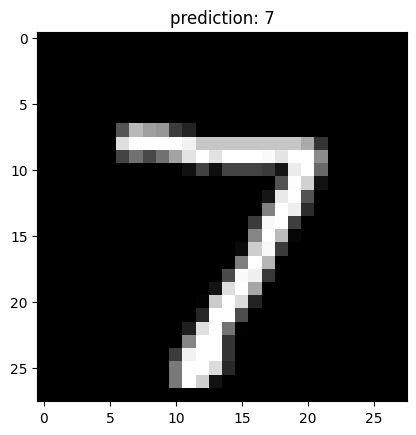

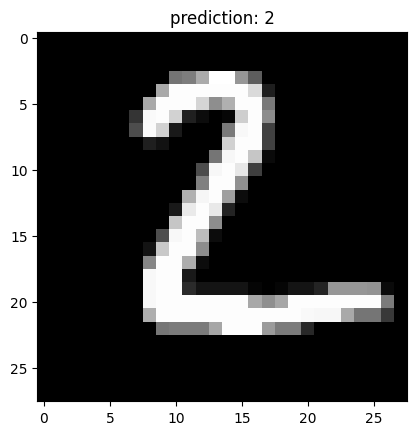

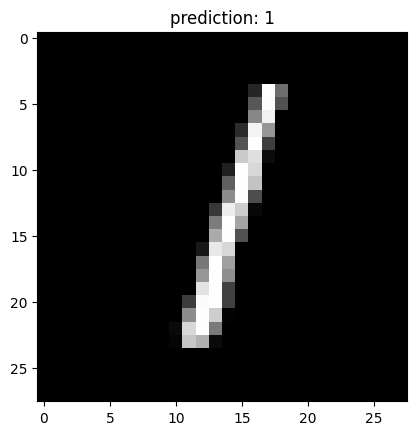

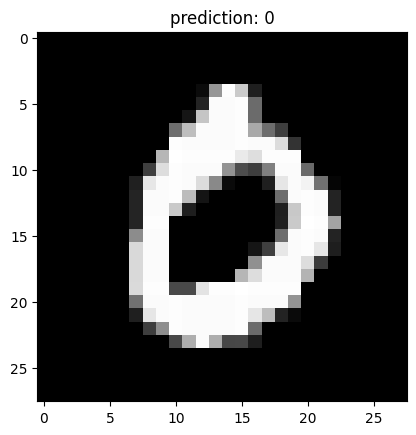

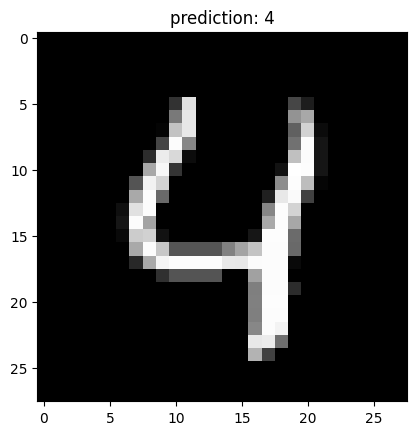

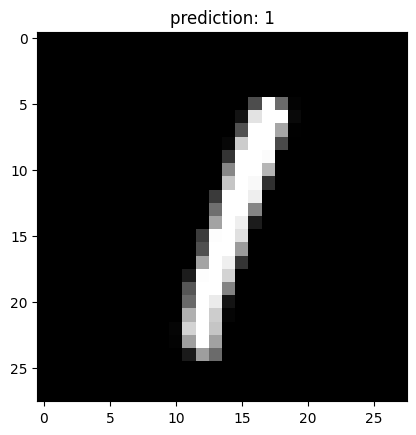

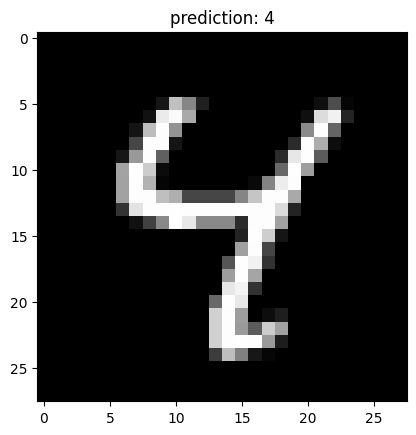

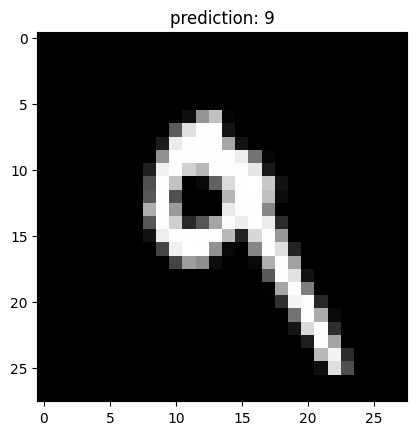

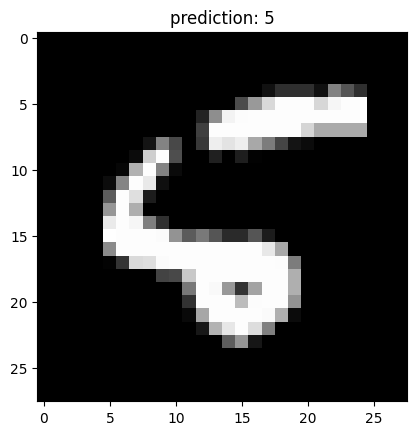

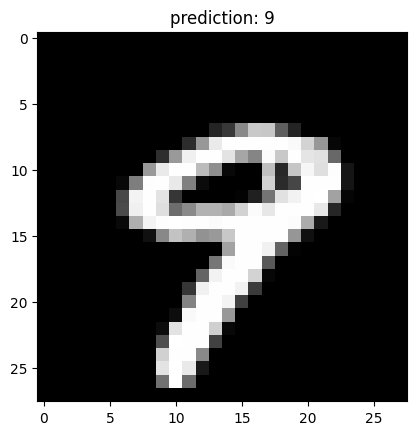

In [29]:
predictions = model.predict(Xtest)
predicted_labels = np.argmax(predictions, axis=1)
for i in range (10):  
    plt.imshow(Xtest[i], cmap='gray')
    plt.title(f"prediction: {predicted_labels[i]}")
    plt.show()


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Xtrain = Xtrain.reshape(Xtrain.shape[0], -1)
Xtest = Xtest.reshape(Xtest.shape[0], -1)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(Xtrain, Ytrain)
knn_predictions = knn.predict(Xtest)

print(accuracy_score(Ytest, knn_predictions))

print(knn_predictions)

0.9688
[7 2 1 ... 4 5 6]


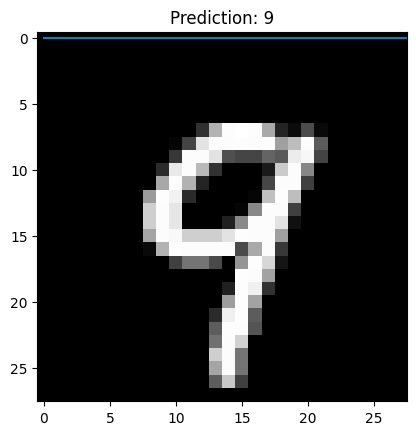

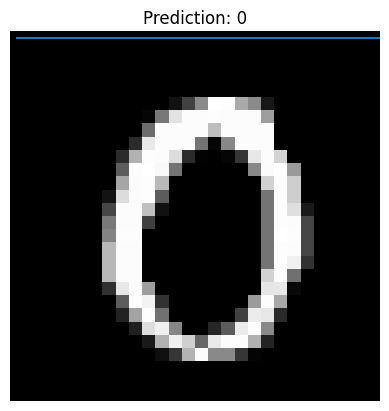

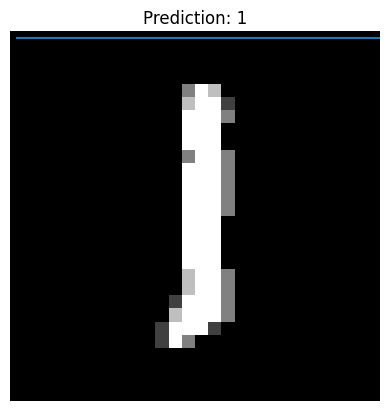

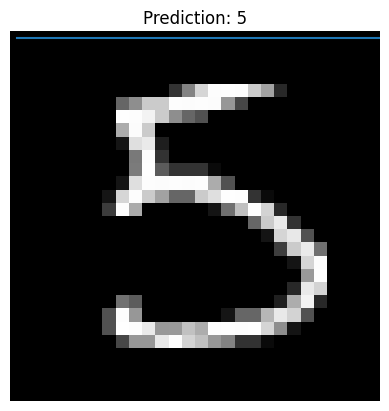

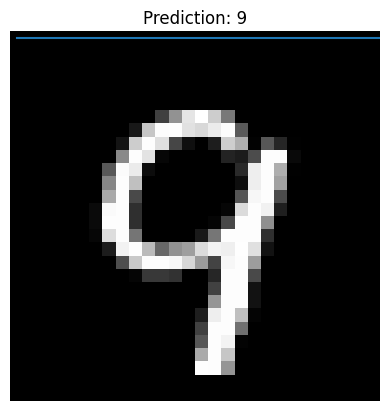

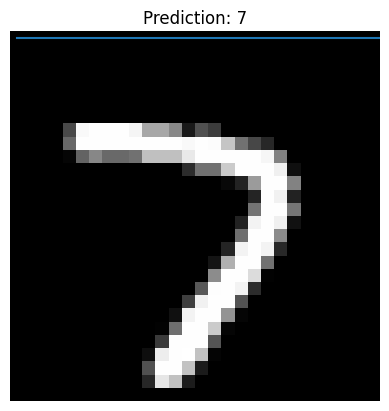

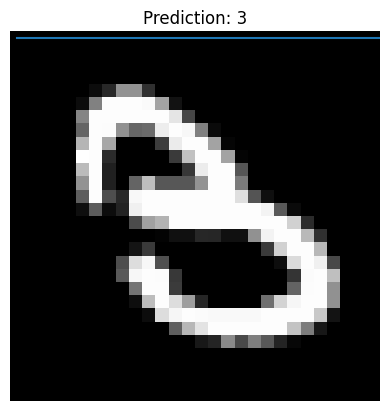

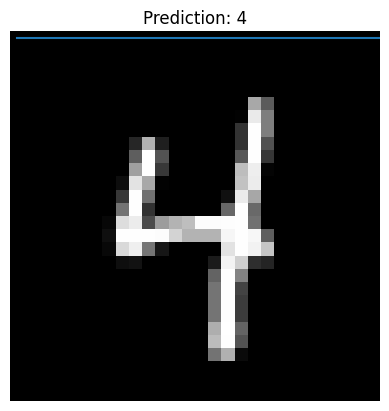

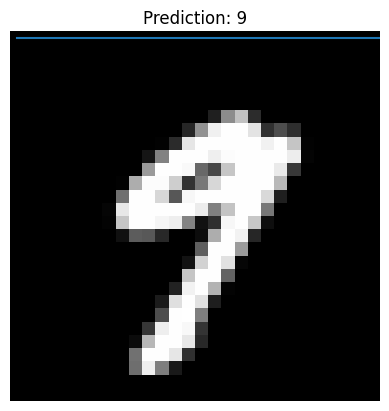

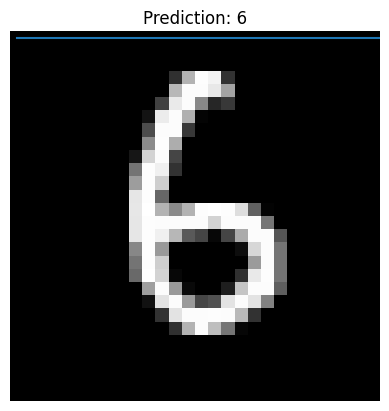

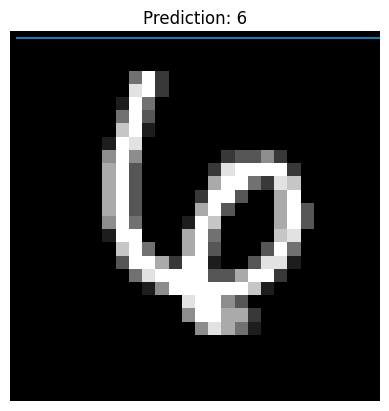

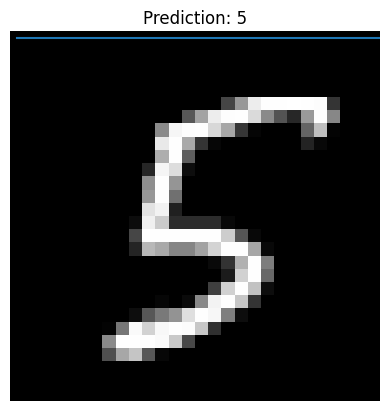

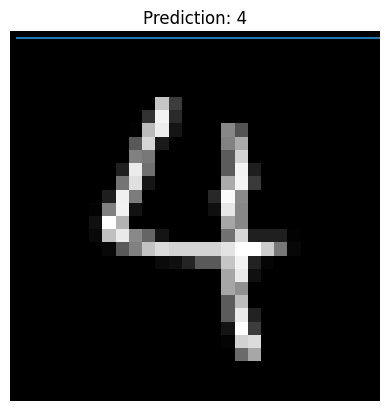

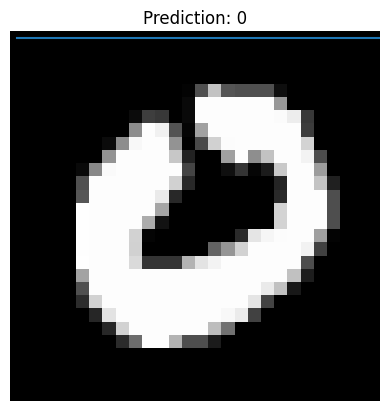

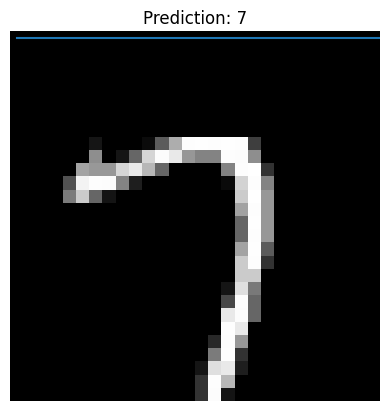

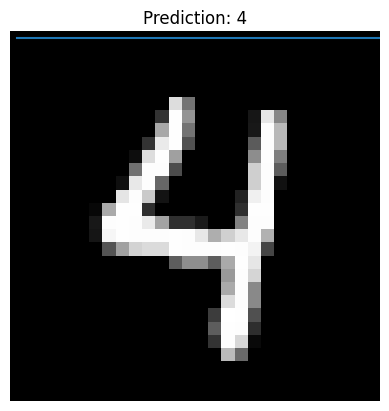

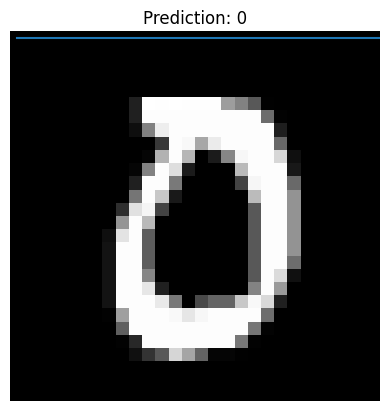

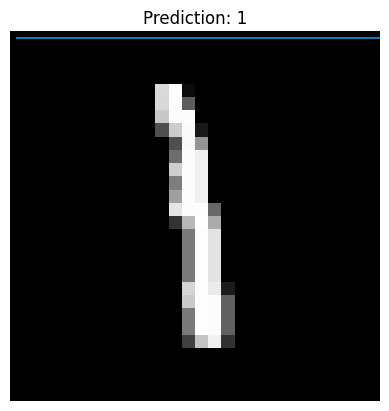

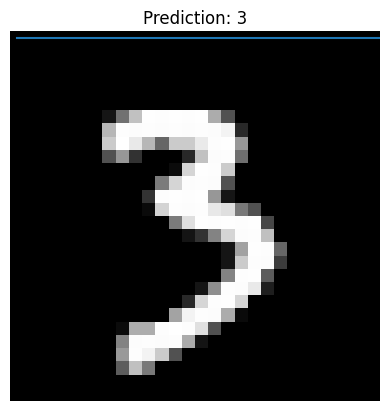

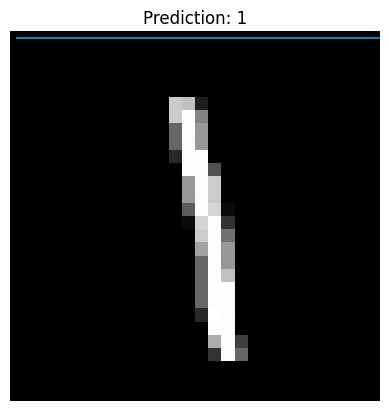

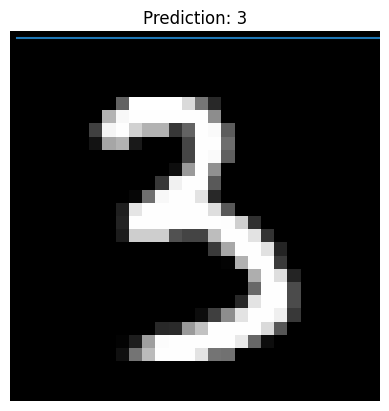

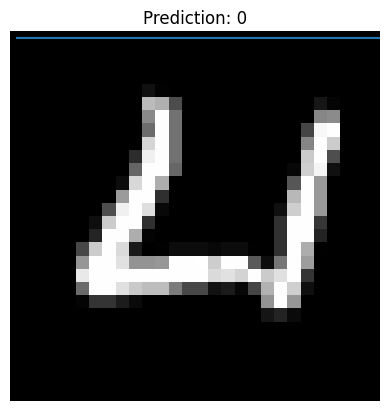

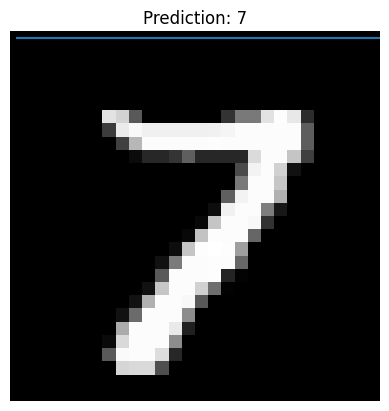

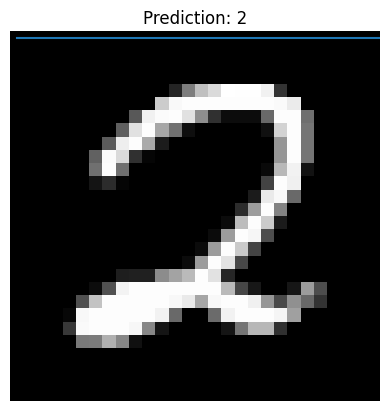

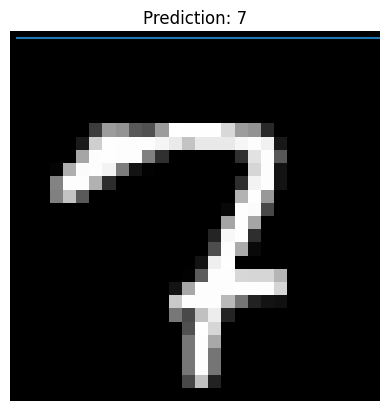

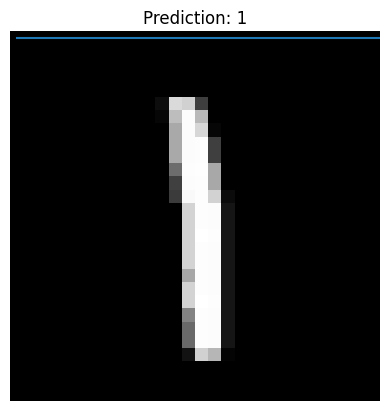

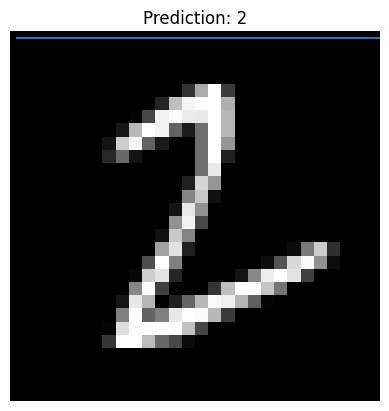

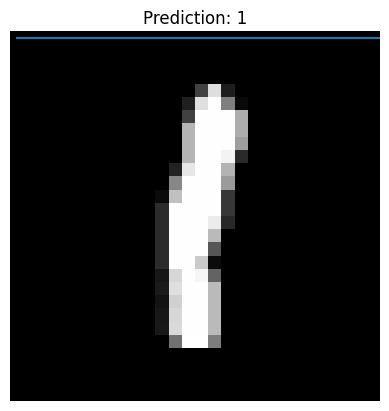

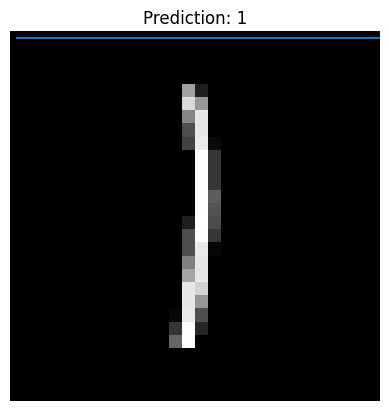

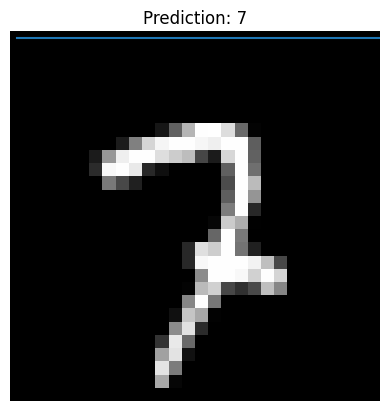

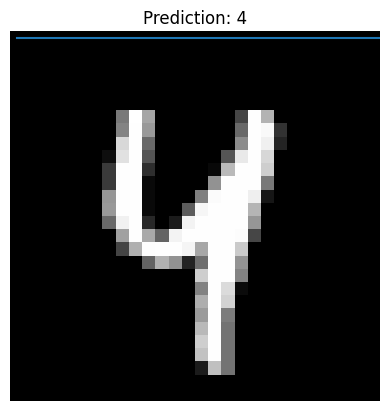

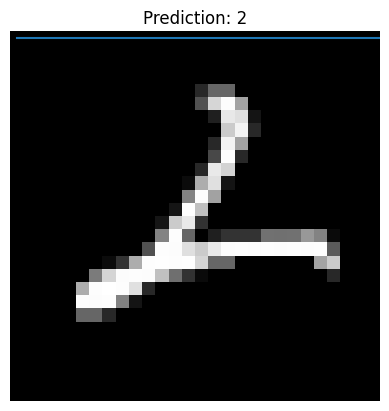

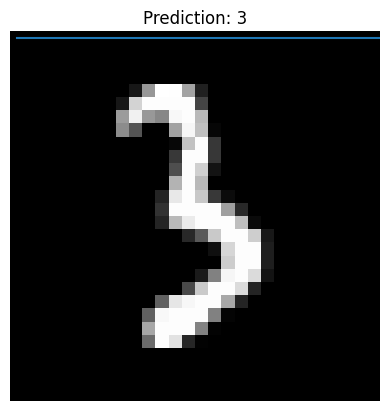

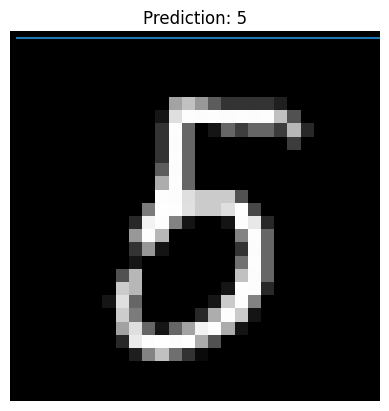

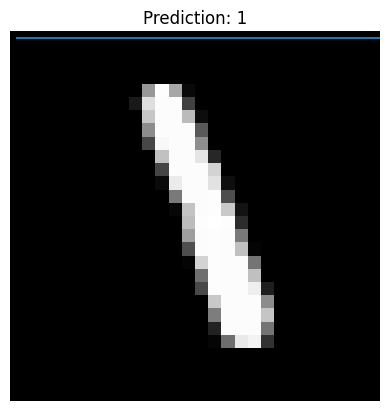

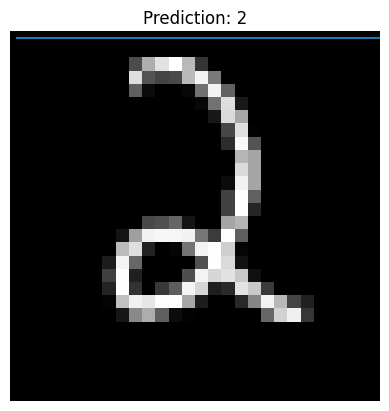

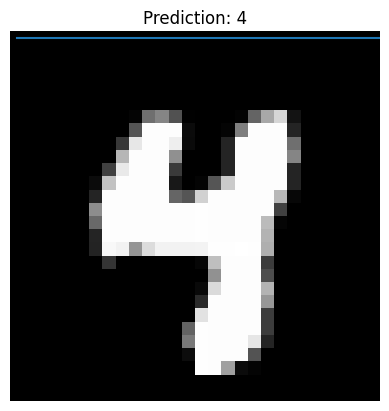

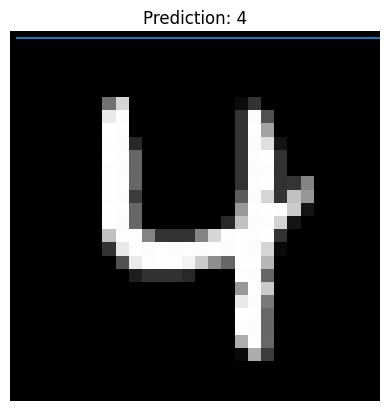

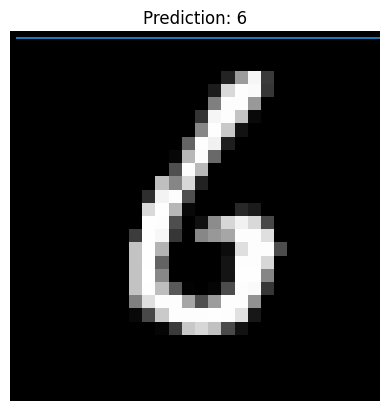

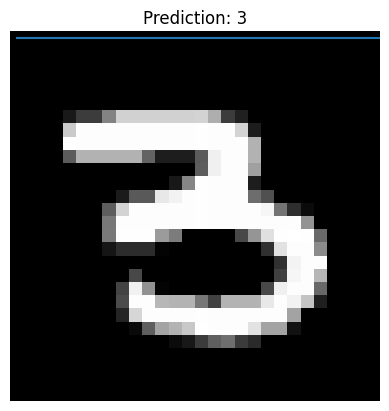

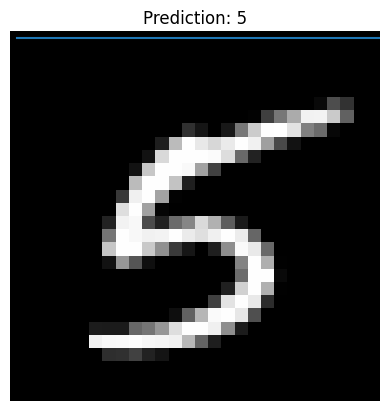

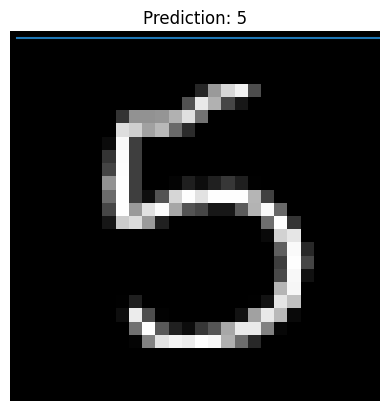

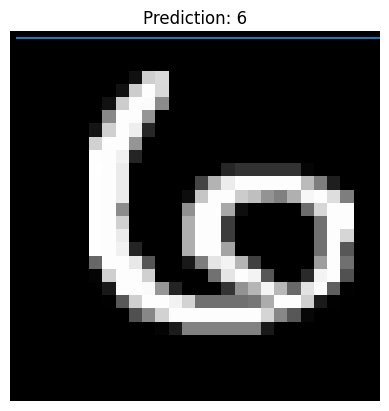

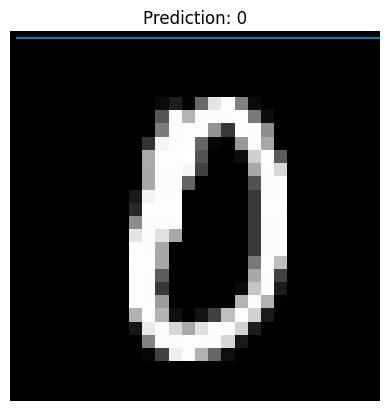

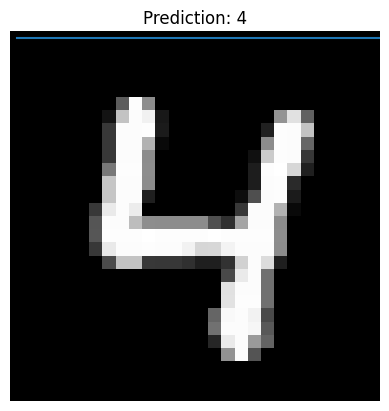

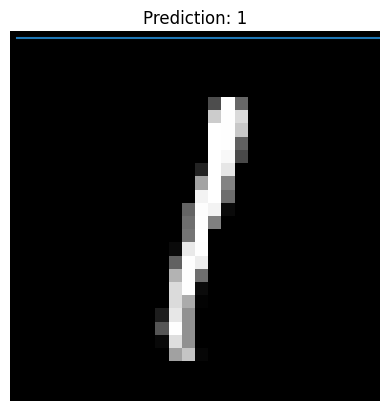

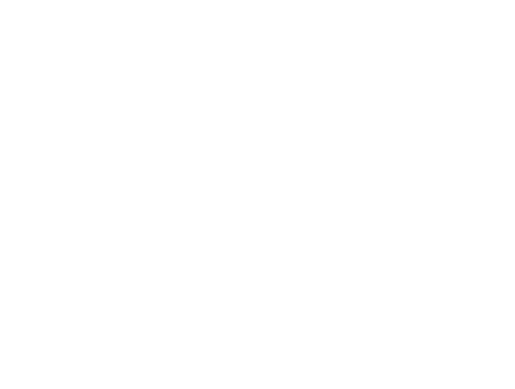

In [8]:
def plotimage(image, pred):
    plt.plot(image)
    plt.imshow(image.reshape(28, 28), cmap="gray")
    plt.title(f"Prediction: {pred}")
    plt.show()
    plt.axis("off")
for i in range(12,58):
    plotimage(Xtest[i], knn_predictions[i])